# Polarization's anisotropies of the CMB

## In this code I compute the Cls of the polarization map

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp 
import pymaster as nmt

In [52]:
# read map
pol_map=hp.read_map('/home/akozameh/COM_CMB_IQU-smica_2048_R3.00_hm2.fits', [1,2])

In [53]:
# Resolution 
map_pol=hp.pixelfunc.ud_grade(pol_map, 1024)

In [54]:
# Read mask and apodize it on a scale of ~1deg
mask= nmt.mask_apodization(hp.read_map('/home/akozameh/cmblss/data/COM_Mask_CMB-common-Mask-Pol_2048_R3.00.fits', verbose=False),
                            1., apotype="Smooth")

In [55]:
#Nside =256 resolution of the map
mask=hp.pixelfunc.ud_grade(mask,1024)

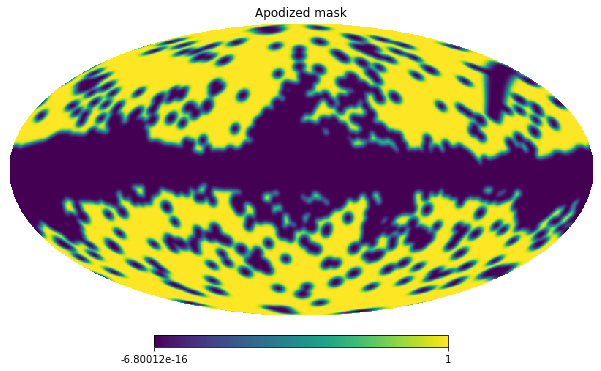

In [56]:
hp.mollview(mask, title='Apodized mask')
plt.show()

In [57]:
# Read healpix maps and initialize a spin-1 field
f_2 = nmt.NmtField(mask, map_pol)

In [48]:
# Initialize binning scheme with 4 ells per bandpower
b = nmt.NmtBin.from_nside_linear(1024, 4)

In [49]:
# Compute MASTER estimator
# spin-2 x spin-2
cl_22 = nmt.compute_full_master(f_2, f_2, b)

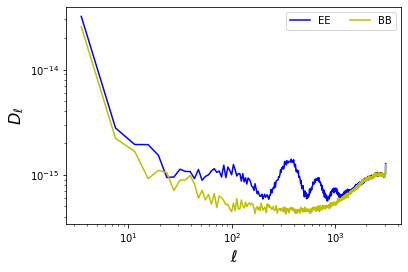

In [60]:
# Plot results
l = b.get_effective_ells()
plt.plot(l, cl_22[0], 'b-', label='EE')
plt.plot(l, cl_22[3], 'y-', label='BB')
plt.loglog()
plt.xlabel('$\\ell$', fontsize=16)
plt.ylabel('$D_\\ell$', fontsize=16)
plt.legend(loc='upper right', ncol=2, labelspacing=0.1)
plt.show()
